## 1. Introduction

1. Introduction
2. Data Loading
3. Dataset Overview
4. Exploratory Data Analysis
   4.1 Dataset Summary
   4.2 Taxonomic Composition
   4.3 Species Richness
   4.4 Geographic Distribution
   4.5 Temporal Trends
5. Key Findings

## 2. Data Loading

In [58]:
# importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

In [59]:
# cargar el documento csv con pd.read_csv, creando el dataframe
df_wsc_cleaned = pd.read_csv('/Users/yayo/Documents/GitHub/jumping_spider_salticidae/data/processed/wsc_cleaned.csv')
df_conabio_cleaned = pd.read_csv('/Users/yayo/Documents/GitHub/jumping_spider_salticidae/data/processed/conabio_cleaned.csv')

## 3. Dataset Overview

### 3a. df_wsc_cleaned

In [60]:
df_wsc_cleaned.head(3)

,family,genus,species,author,year,distribution,binomial_name
0,Actinopodidae,Actinopus,caraiba,Simon,1889.0,Venezuela,Actinopus caraiba
1,Actinopodidae,Actinopus,crassipes,Keyserling,1891.0,"Brazil, Paraguay, Argentina",Actinopus crassipes
2,Actinopodidae,Actinopus,cucutaensis,Mello-Leitão,1941.0,"Colombia, Venezuela, Brazil",Actinopus cucutaensis


In [61]:
# dataframe dimensions (rows and columns)
print(f"Number of rows: {df_wsc_cleaned.shape[0]}")
print(f"Number of columns: {df_wsc_cleaned.shape[1]}")

Number of rows: 64288
Number of columns: 7


In [62]:
df_wsc_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64288 entries, 0 to 64287
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   family         64288 non-null  object 
 1   genus          64288 non-null  object 
 2   species        64288 non-null  object 
 3   author         64288 non-null  object 
 4   year           64287 non-null  float64
 5   distribution   64139 non-null  object 
 6   binomial_name  64288 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.4+ MB


### 3b. df_conabio_cleaned

In [63]:
df_conabio_cleaned.head(3)

,aniocolecta,procedenciaejemplar,urlejemplar,orden,familia,genero,especie,reftax,autor,familiavalida,...,paismapa,claveestadomapa,estadooriginal,estadomapa,clavemunicipiomapa,municipiooriginal,municipiomapa,region,anp,altitudmapa
0,2017.0,PreservedSpecimen,http://www.snib.mx/snibgeoportal/Ejemplar.php?...,Araneae,Salticidae,Phidippus,NaN,"Richman, Cutler & Hill, 2012",NaN,Salticidae,...,MEXICO,8.0,CHIHUAHUA,CHIHUAHUA,8037.0,JUAREZ,JUAREZ,MEXICO / CHIHUAHUA / JUAREZ,Federal: Médanos de Samalayuca,1312.0
1,2019.0,HumanObservation,http://www.snib.mx/snibgeoportal/Ejemplar.php?...,Araneae,Salticidae,Hentzia,Hentzia palmarum,"World Spider Catalog, 2023","(Hentz, 1832)",Salticidae,...,MEXICO,NaN,VERACRUZ DE IGNACIO DE LA LLAVE,NaN,NaN,TAMIAHUA,NaN,MEXICO / VERACRUZ DE IGNACIO DE LA LLAVE / TAM...,Federal: Sistema Arrecifal Lobos-Tuxpan,8.0
2,2017.0,PreservedSpecimen,http://www.snib.mx/snibgeoportal/Ejemplar.php?...,Araneae,Salticidae,Phidippus,NaN,"Richman, Cutler & Hill, 2012",NaN,Salticidae,...,MEXICO,8.0,CHIHUAHUA,CHIHUAHUA,8037.0,JUAREZ,JUAREZ,MEXICO / CHIHUAHUA / JUAREZ,Federal: Médanos de Samalayuca,1323.0


In [64]:
# dataframe dimensions (rows and columns)
print(f"Number of rows: {df_conabio_cleaned.shape[0]}")
print(f"Number of columns: {df_conabio_cleaned.shape[1]}")

Number of rows: 11751
Number of columns: 29


In [65]:
df_conabio_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   aniocolecta          11666 non-null  float64
 1   procedenciaejemplar  11751 non-null  object 
 2   urlejemplar          11751 non-null  object 
 3   orden                11751 non-null  object 
 4   familia              11751 non-null  object 
 5   genero               11400 non-null  object 
 6   especie              10203 non-null  object 
 7   reftax               11681 non-null  object 
 8   autor                10133 non-null  object 
 9   familiavalida        11675 non-null  object 
 10  generovalido         11324 non-null  object 
 11  especievalida        10127 non-null  object 
 12  reftaxvalido         11675 non-null  object 
 13  autorvalido          11308 non-null  object 
 14  taxonvalidado        11751 non-null  object 
 15  exoticainvasora      391 non-null   

## 4. Visualization Settings

In [ ]:
# crear una paleta de colores con 'viridis'
colors = sns.color_palette('viridis', n_colors=10)[::-1]

## 5. Dataset Analysis

### 4.1 Taxonomic Composition Analysis

Distribution of Records by Family

Conteo
Porcentaje
Gráfica

In [83]:
df_family = df_wsc_cleaned['family'].value_counts()

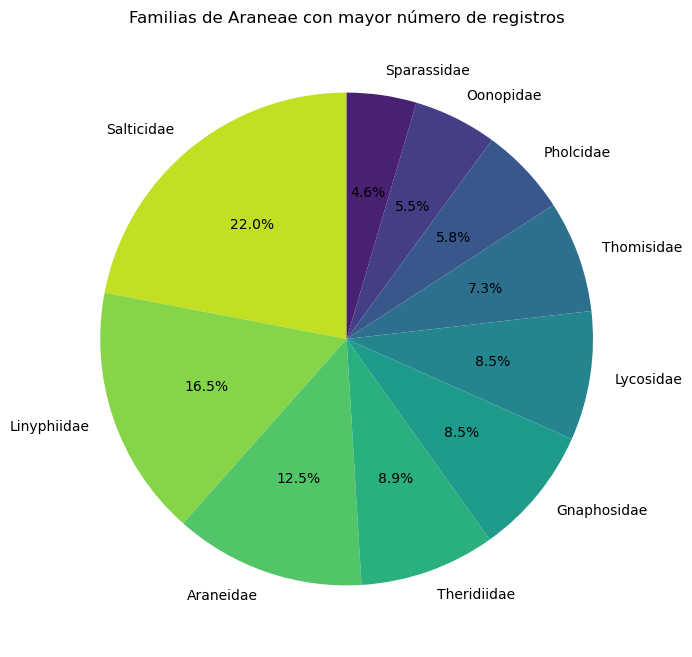

In [84]:
df_family.head(10).plot(kind='pie', autopct='%1.1f%%',colors=colors, figsize=(8, 8), startangle=90)
plt.title('Familias de Araneae con mayor número de registros')
plt.ylabel('')
plt.show()

### 4.3 Species Richness Analysis

Ejemplo:

Número de especies por familia

Familias con mayor riqueza específica

In [106]:
family_summary = (
    df_wsc_cleaned
        .groupby('family')
        .agg(
            genera_count=('genus', 'nunique'),
            species_count=('species', 'nunique'),
            binomial_name=('binomial_name', 'nunique')
        )
        .sort_values(by='species_count', ascending=False)
)

family_summary.head(10)

,genera_count,species_count,binomial_name
family,,,
Salticidae,695,5808,8194
Linyphiidae,640,4491,6083
Araneidae,197,3838,4429
Theridiidae,138,2924,3284
Lycosidae,140,2735,3091
Gnaphosidae,154,2729,3138
Thomisidae,172,2303,2676
Pholcidae,97,2017,2184
Oonopidae,115,1779,2054


#### 4.1a. df_wsc_cleaned

In [ ]:
print(f"Número de familias: {df_wsc_cleaned['family'].nunique()}")
print(f"Número de géneros: {df_wsc_cleaned['genus'].nunique()}")
print(f"Número de especies: {df_wsc_cleaned['binomial_name'].nunique()}")

Número de familias: 139
Número de géneros: 4501
Número de especies: 63087


In [ ]:
# Filtrar las filas donde 'family' sea 'Salticidae'
df_salticidae = df_wsc_cleaned[
    (df_wsc_cleaned['family'] == 'Salticidae')
]

print(f"Número de familias: {df_salticidae['family'].nunique()}")
print(f"Número de géneros: {df_salticidae['genus'].nunique()}")

Número de familias: 1
Número de géneros: 695


In [107]:
salticidae_summary = (
    df_wsc_cleaned
        .groupby('genus')
        .agg(
            species_count=('species', 'nunique'),
            binomial_name=('binomial_name', 'nunique')
        )
        .sort_values(by='species_count', ascending=False)
)

salticidae_summary.head(10)

,species_count,binomial_name
genus,,
Pardosa,696,696
Theridion,671,671
Araneus,667,667
Clubiona,637,637
Zelotes,488,488
Pholcus,455,455
Tetragnatha,412,412
Xysticus,379,379
Dysdera,371,371


In [81]:
# Filtrar las filas donde 'distribution' sea 'Mexico' y 'family' sea 'Salticidae'
df_salticidae_mexico = df_wsc_cleaned[
    (df_wsc_cleaned['distribution'].str.contains('Mexico', na=False, case=False)) &
    (df_wsc_cleaned['family'] == 'Salticidae')
]

print(f"Número de familias: {df_salticidae_mexico['family'].nunique()}")
print(f"Número de géneros: {df_salticidae_mexico['genus'].nunique()}")

Número de familias: 1
Número de géneros: 70


In [108]:
salticidae_mexico_summary = (
    df_salticidae_mexico
        .groupby('genus')
        .agg(
            species_count=('species', 'nunique'),
            binomial_name=('binomial_name', 'nunique')
        )
        .sort_values(by='species_count', ascending=False)
)

salticidae_mexico_summary.head(10)

,species_count,binomial_name
genus,,
Habronattus,57,57
Phidippus,45,45
Pelegrina,19,19
Lyssomanes,18,18
Paraphidippus,14,14
Corythalia,12,12
Metaphidippus,8,8
Sassacus,7,7
Paramarpissa,6,6


#### 4.1b df_conabio_cleaned

In [74]:
print(f"Número de familias: {df_conabio_cleaned['familiavalida'].nunique()}")
print(f"Número de géneros: {df_conabio_cleaned['generovalido'].nunique()}")
# print(f"Número de especies: {df_wsc_cleaned['binomial_name'].nunique()}")

Número de familias: 1
Número de géneros: 79


### 4.4 Geographic Distribution Analysis (si aplica)

Si tienes distribution:

Conteo por país

Mapas (si hicieras)

Top regiones

#### 4.4.1 Jumping spiders in Mexico and other countries

In [70]:
# Filtrar las filas donde 'distribution' sea 'Mexico' y 'family' sea 'Salticidae'
df_salticidae_mexico_world = df_wsc_cleaned[
    (df_wsc_cleaned['distribution'].str.contains('Mexico', na=False, case=False)) &
    (df_wsc_cleaned['family'] == 'Salticidae')
]

# Verificar cuántos registros hay en el nuevo DataFrame
print(f"Total de registros donde 'distribution' es 'Mexico' y 'family' es 'Salticidae': {len(df_salticidae_mexico_world)}")

Total de registros donde 'distribution' es 'Mexico' y 'family' es 'Salticidae': 294


#### 4.4.2 Jumping spiders in Mexico and other countries

### Arañas salticidae en México

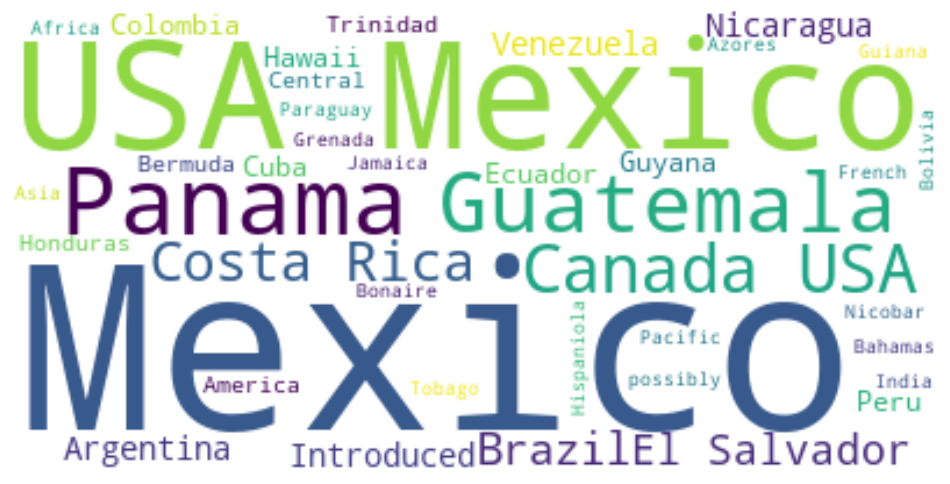

In [71]:
#word cloud
# Generar el texto a partir de los paises
text = " ".join(df_salticidae_mexico_world['distribution'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

In [72]:
#¿Cómo ha cambiado el descubrimiento de especies a lo largo del tiempo?
# Contar el número de especies descritas por año
especies_por_ano = df_salticidae_mexico['year'].value_counts().sort_index()
print("Especies descritas por año:")
print(especies_por_ano)

# Graficar la tendencia
especies_por_ano.plot(kind='line', figsize=(10, 6), marker='o', color='teal')
plt.title("Especies de Salticidae descritas por año en México")
plt.xlabel("Año")
plt.ylabel("Cantidad de especies")
plt.grid(True)
plt.show()

NameError: name 'df_salticidae_mexico' is not defined

In [ ]:
#¿Cuántos géneros únicos de Salticidae hay en México?
generos_unicos = df_salticidae_mexico_world['genus'].nunique()
print(f"Géneros únicos de Salticidae en México: {generos_unicos}")

Géneros únicos de Salticidae en México: 70


In [ ]:
#¿Cuál es el género con mayor cantidad de especies en México?
generos_mas_diversos = df_salticidae_mexico_world['genus'].value_counts()
print("Género con mayor cantidad de especies:")
print(generos_mas_diversos.head(1))

Género con mayor cantidad de especies:
genus
Habronattus    57
Name: count, dtype: int64


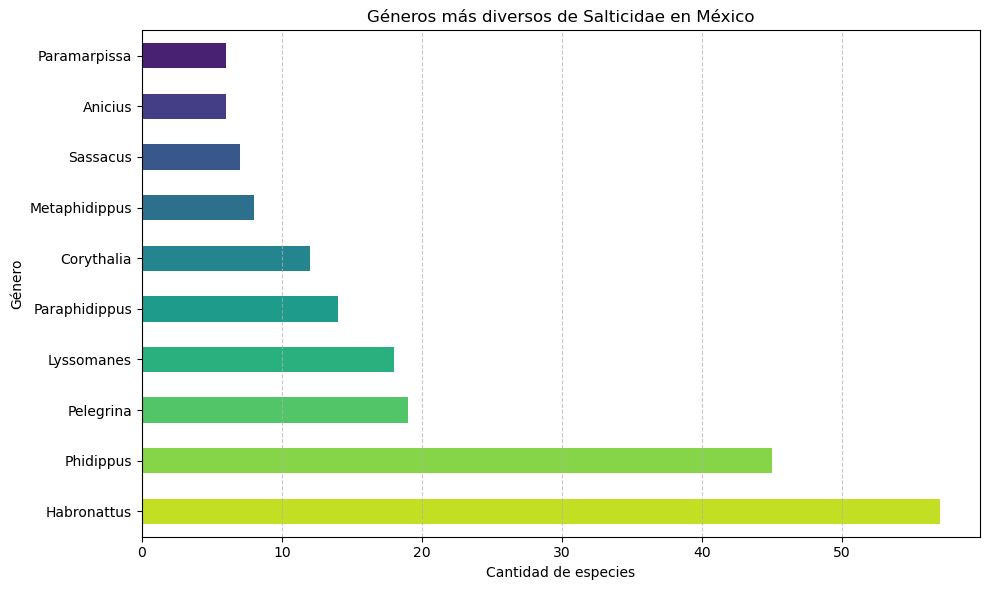

In [ ]:
generos_mas_diversos.head(10).plot(kind='barh', color=colors, figsize=(10, 6))
plt.title('Géneros más diversos de Salticidae en México')
plt.xlabel('Cantidad de especies')
plt.ylabel('Género')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

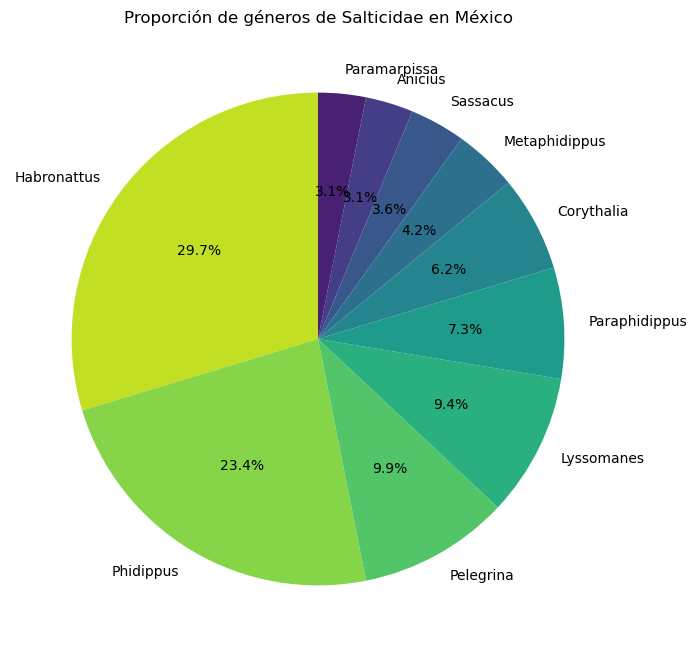

In [ ]:
generos_mas_diversos.head(10).plot(kind='pie', autopct='%1.1f%%',colors=colors, figsize=(8, 8), startangle=90)
plt.title('Proporción de géneros de Salticidae en México')
plt.ylabel('')
plt.show()

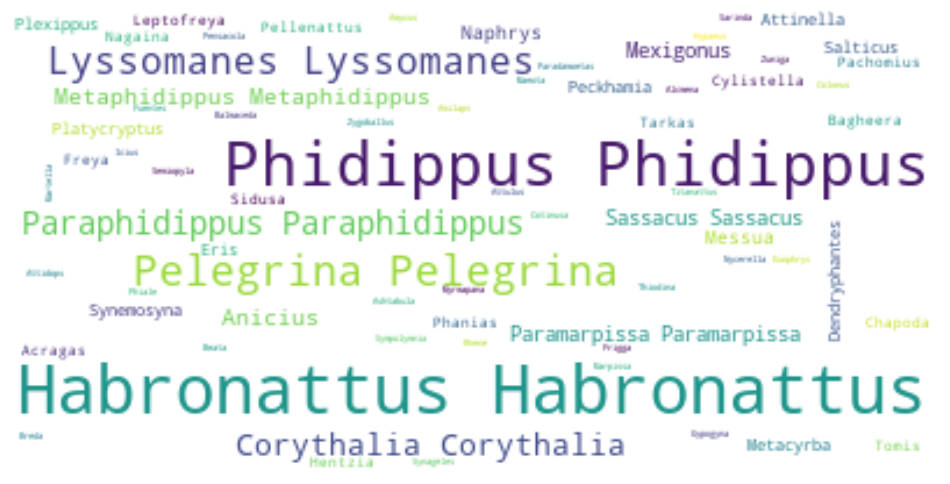

In [ ]:
#word cloud
# Generar el texto a partir del genero
text = " ".join(df_salticidae_mexico_world['genus'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

In [ ]:
#¿Cuántas especies únicas de Salticidae hay en México?
especies_unicas = df_salticidae_mexico_world['species'].nunique()
print(f"Especies únicas de Salticidae en México: {especies_unicas}")

Especies únicas de Salticidae en México: 275


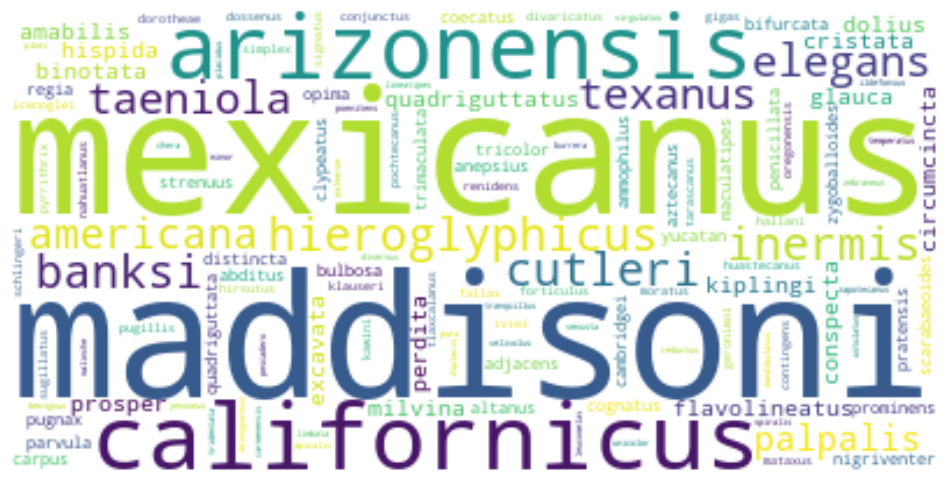

In [ ]:
#word cloud
# Generar el texto a partir de las especies
text = " ".join(df_salticidae_mexico_world['species'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

In [ ]:
#¿Cuáles son los autores más frecuentes en la descripción de estas especies?
autores_frecuentes = df_salticidae_mexico_world['author'].value_counts()
print("Autores más frecuentes en la descripción de especies:")
print(autores_frecuentes.head(10))

Autores más frecuentes en la descripción de especies:
author
G. W. Peckham & E. G. Peckham    58
F. O. Pickard-Cambridge          52
Banks                            22
Griswold                         22
Chamberlin                       16
Edwards                          16
Maddison                         15
C. L. Koch                       13
Hentz                             6
Richman                           5
Name: count, dtype: int64


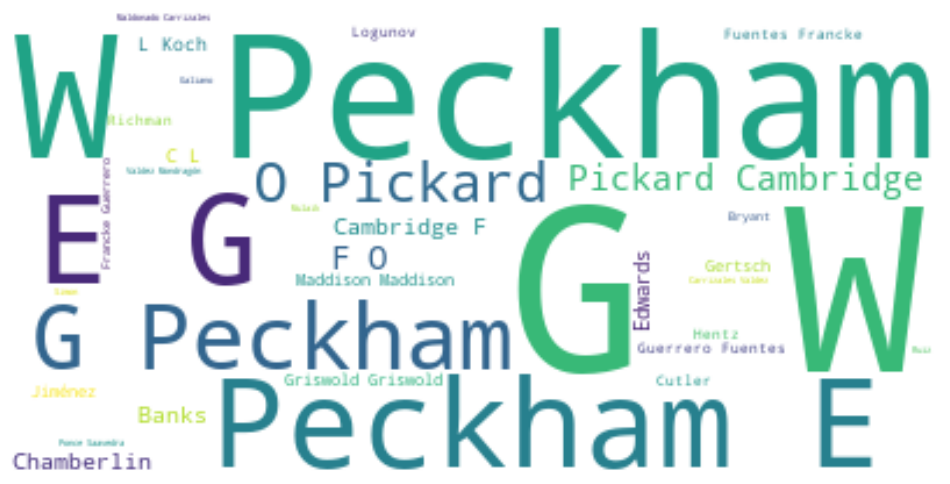

In [ ]:
# Paso 1: Trabajar directamente con la columna 'author' sin modificar el DataFrame
authors_column = df_salticidae_mexico_world['author'].astype(str).str.replace("&", ",", regex=False)  # Reemplazar & con ,
authors_list = authors_column.str.split(',').explode()  # Dividir por "," y "explode" para separar nombres en filas

# Paso 2: Eliminar espacios adicionales y NaN
authors_list = authors_list.str.strip()  # Quitar espacios al inicio y al final
authors_list = authors_list.dropna()  # Eliminar valores NaN

# Paso 3: Generar el texto para la nube de palabras
text = " ".join(authors_list)

# Paso 4: Crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# Paso 5: Configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # Establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # Mostrar la nube de palabras
plt.axis("off")  # Ocultar ejes
plt.show()  # Mostrar la figura

### Key Findings

Muy importante para portafolio.

Resume:

Familias dominantes

Patrones observados

Sesgos posibles del dataset